Plot Figure 1: Behavior and Neural Discrimination plots

In [1]:
import scipy.stats as s
import numpy as np
import matplotlib.pyplot as plt
from os import path
import seaborn as sns

# Import project specific modules and enable automatic reloading
import sys
from pathlib import Path
import os
eraser_path = Path(os.getcwd()).parent
reinstatement_path = eraser_path.parent / 'FearReinstatement'
sys.path.append(str(eraser_path))
sys.path.append(str(reinstatement_path))
%load_ext autoreload
%autoreload 2

import eraser_reference as err
import er_plot_functions as er
from plotting import Fig, pretty_plot

/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble6/20180421_1_openfield: nbadpts = 63 max_in_a_row = 38
['Unknown file missing and/or IndexError for Marble06 Open 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble06 Shock 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 4']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 1']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 2']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 7']
Freezing left as NaN for this session
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181126_1_openfield: nbadpts = 18 max_in_a_row = 3
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181127_1_openfield: nbadpts = 10 max_in_a_row = 4
/Users/nkinsky/Documents/BU/Working/Era

Text(0.5, 1.0, 'Learners')

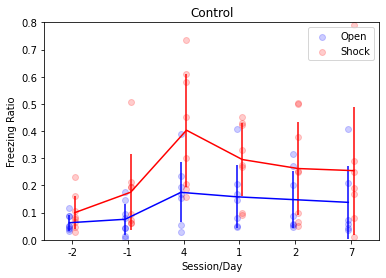

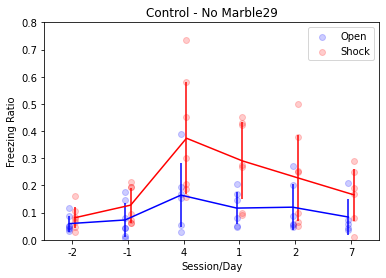

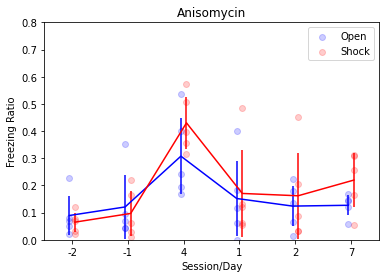

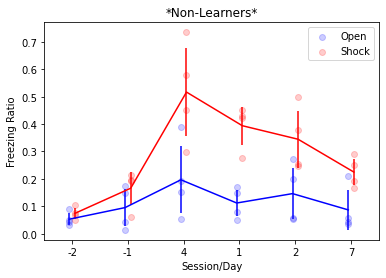

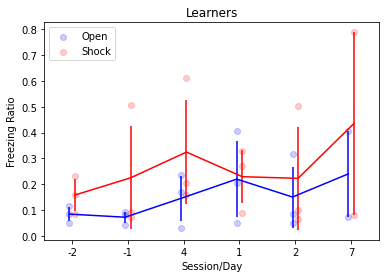

In [4]:
## Get difference in context-specific freezing between groups
figc, axc, fratio_cont = er.plot_all_freezing(err.control_mice_good)
axc.set_ylim([0, 0.80])
axc.set_title('Control')

# Exclude 29 who is freezing a bunch before even being shocked in shock arena
figcn29, axcn29, fratio_contn29 = er.plot_all_freezing(err.control_mice[0:-1])
axcn29.set_ylim([0, 0.80])
axcn29.set_title('Control - No Marble29')

figa, axa, fratio_ani = er.plot_all_freezing(err.ani_mice_good)
axa.set_ylim([0, 0.80])
axa.set_title('Anisomycin')
_, axg, fratio_gen = er.plot_all_freezing(err.learners)
axg.set_title('Learners')
_, axd, fratio_disc = er.plot_all_freezing(err.nonlearners)
axd.set_title('*Non-Learners*')

In [36]:
Fig1.savefig(Path('/Users/nkinsky/Documents/BU/Working/Eraser/plots/Fig1testlargefig'), scriptname='Figure1Notebook')

[8.5 3. ]


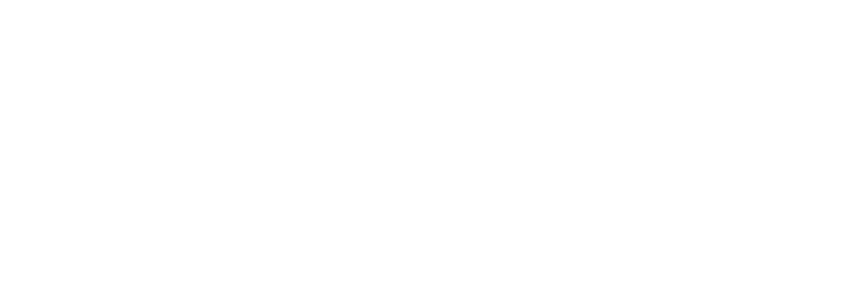

In [33]:
%matplotlib notebook
Fig1 = Fig(grid=(2, 4), size=(8.5, 3), fontsize=6)
print(Fig1.fig.get_size_inches())

In [34]:
axc = Fig1.subplot(243)
figc, axc, fratio_cont = er.plot_all_freezing(err.control_mice_good, ax=axc, s=9, xoffset=0.1)
axc.set_ylim([0, 0.80])
axc.set_title('Control')

/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble6/20180421_1_openfield: nbadpts = 63 max_in_a_row = 38
['Unknown file missing and/or IndexError for Marble06 Open 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble06 Shock 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 4']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 1']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 2']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 7']
Freezing left as NaN for this session
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181126_1_openfield: nbadpts = 18 max_in_a_row = 3
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181127_1_openfield: nbadpts = 10 max_in_a_row = 4


Text(0.5, 1.0, 'Control')

In [35]:
axa = Fig1.subplot(244)
figa, axa, fratio_ani = er.plot_all_freezing(err.ani_mice_good, ax=axa, s=9, xoffset=0.1)
axa.set_ylim([0, 0.80])
axa.set_title('Anisomycin')

/Users/nkinsky/Documents/BU/Working/Eraser/Anisomycin Group/Marble25/20181203_1_openfield: nbadpts = 9 max_in_a_row = 6


Text(0.5, 1.0, 'Anisomycin')

In [28]:
fratio_cont[:,:,1]

array([[0.08844444, 0.14813167, 0.38817821, 0.14816453, 0.27188329,
        0.21057269],
       [0.06723063, 0.21326803, 0.58058771, 0.42876224, 0.49866429,
        0.25111309]])

In [27]:
fratio_ani[:,:,0]

array([[0.22864652, 0.07001321, 0.2408377 , 0.18450022, 0.13548951,
        0.14285714],
       [0.07034728, 0.00890472, 0.31745325, 0.13178985, 0.08771149,
        0.31255565]])

In [ ]:
## Run stats
pval_bwgroup_1sidedt_specific = np.ones(6)*np.nan
pval_bwgroup_1sidedt_specific_no29 = np.ones(6)*np.nan
pval_bwgroup_1sidedt_shockonly = np.ones(6)*np.nan # bw group direct, no accounting for specificity
for id in range(0, 6):
    stats, pval = s.ttest_ind(fratio_ani[1, id, :].reshape(-1) - fratio_ani[0, id, :].reshape(-1),
                              fratio_cont[1, id, :].reshape(-1) - fratio_cont[0, id, :].reshape(-1),
                              nan_policy='omit')
    # Marble29 seems to freeze a LOT in the shock arena prior to being shocked. Check if real later, exclude for now.
    stats_no29, pval_no29 = s.ttest_ind(fratio_ani[1, id, :].reshape(-1) - fratio_ani[0, id, :].reshape(-1),
                              fratio_cont[1, id, 0:7].reshape(-1) - fratio_cont[0, id, 0:7].reshape(-1),
                              nan_policy='omit')

    statss, pvals = s.ttest_ind(fratio_ani[1, id, :], fratio_cont[1, id, :], nan_policy='omit')
    pval_bwgroup_1sidedt_shockonly[id] = pvals/2

    # Hypothesis is that ani freezing is less than control guys relative to neutral arena
    # So if ani guys mean freezing relative to shock is < 0 (i.e. if stats < 0), divide the pvalue by 2
    # If it's actually larger, then test fails and p = 1-pval/2
    if stats < 0:
        pval_bwgroup_1sidedt_specific[id] = pval/2
    elif stats > 0:
        pval_bwgroup_1sidedt_specific[id] = 1 - pval/2

    if stats_no29 < 0:
        pval_bwgroup_1sidedt_specific_no29[id] = pval_no29 / 2
    elif stats_no29 > 0:
        pval_bwgroup_1sidedt_specific_no29[id] = 1 - pval_no29 / 2
# Good for one-sided test!


In [24]:
## Run stats
pval_bwgroup_1sidedt_specific = np.ones(6)*np.nan
pval_bwgroup_1sidedt_specific_no29 = np.ones(6)*np.nan
pval_bwgroup_1sidedt_shockonly = np.ones(6)*np.nan # bw group direct, no accounting for specificity
for id in range(0, 6):
    stats, pval = s.ttest_ind(fratio_ani[1, id, :].reshape(-1) - fratio_ani[0, id, :].reshape(-1),
                              fratio_cont[1, id, :].reshape(-1) - fratio_cont[0, id, :].reshape(-1),
                              nan_policy='omit')
    print(f'stats={stats}, pval={pval}')
    # Marble29 seems to freeze a LOT in the shock arena prior to being shocked. Check if real later, exclude for now.
    stats_no29, pval_no29 = s.ttest_ind(fratio_ani[1, id, :].reshape(-1) - fratio_ani[0, id, :].reshape(-1),
                              fratio_cont[1, id, 0:7].reshape(-1) - fratio_cont[0, id, 0:7].reshape(-1),
                              nan_policy='omit')

    statss, pvals = s.ttest_ind(fratio_ani[1, id, :], fratio_cont[1, id, :], nan_policy='omit')
    pval_bwgroup_1sidedt_shockonly[id] = pvals/2

    # Hypothesis is that ani freezing is less than control guys relative to neutral arena
    # So if ani guys mean freezing relative to shock is < 0 (i.e. if stats < 0), divide the pvalue by 2
    # If it's actually larger, then test fails and p = 1-pval/2
    if stats < 0:
        pval_bwgroup_1sidedt_specific[id] = pval/2
    elif stats > 0:
        pval_bwgroup_1sidedt_specific[id] = 1 - pval/2

    if stats_no29 < 0:
        pval_bwgroup_1sidedt_specific_no29[id] = pval_no29 / 2
    elif stats_no29 > 0:
        pval_bwgroup_1sidedt_specific_no29[id] = 1 - pval_no29 / 2
# Good for one-sided test!


stats=-1.7253362076314858, pval=0.11241133890567225
stats=-1.8582850159796027, pval=0.09007378824326646
stats=-1.361681913810431, pval=0.20318555508141659
stats=-1.8649083204382086, pval=0.0917724264231003
stats=-1.5500298251139697, pval=0.15217825851761962
stats=-0.930708999499692, pval=0.37629411779605804


In [21]:
pval_bwgroup_1sidedt_specific

array([0.05620567, 0.04503689, 0.10159278, 0.04588621, 0.07608913,
       0.18814706])

In [22]:
pval_bwgroup_1sidedt_specific_no29

array([0.08952588, 0.02529879, 0.14911709, 0.01065384, 0.10736437,
       0.36202724])

In [29]:
##  Now between day -1 and day 1 for each group, shock arena only

validc_bool = np.bitwise_and(~np.isnan(fratio_cont[1, 1, :]),
                             ~np.isnan(fratio_cont[1, 3, :]))
statsc_paired, pvalc_paired = s.ttest_rel(fratio_cont[1, 1, validc_bool],
                                          fratio_cont[1, 3, validc_bool])
statsc_ind, pvalc_ind = s.ttest_ind(fratio_cont[1, 1, ~np.isnan(fratio_cont[1, 1, :])],
                                    fratio_cont[1, 3, ~np.isnan(fratio_cont[1, 3, :])])


In [40]:
fratio_ani[1, 3, :] - fratio_ani[0, 3, :]

array([-0.05271037,  0.05520926,  0.05772534, -0.05428536,         nan,
        0.08699029])

In [30]:
pvalc_paired

0.08242081908092468

In [31]:
pvalc_ind

0.1206616249006455